## iminuit example
from https://iminuit.readthedocs.io/en/stable/notebooks/basic_tutorial.html

In [ ]:
# basic setup of the notebook
from matplotlib import pyplot as plt
import numpy as np

# everything in iminuit is done through the Minuit object, so we import it
from iminuit import Minuit

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares

# display iminuit version
import iminuit
print("iminuit version:", iminuit.__version__)

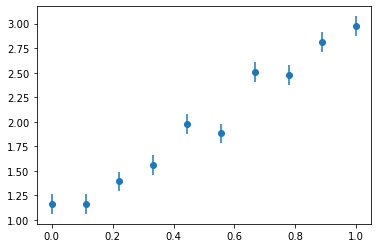

In [2]:
# our line model, unicode parameter names are supported :)
def line(x, α, β):
    return α + x * β


# generate random toy data with random offsets in y
np.random.seed(1)
data_x = np.linspace(0, 1, 10)
data_yerr = 0.1  # could also be an array
data_y = line(data_x, 1, 2) + data_yerr * np.random.randn(len(data_x))

# draw toy data
plt.errorbar(data_x, data_y, data_yerr, fmt="o");

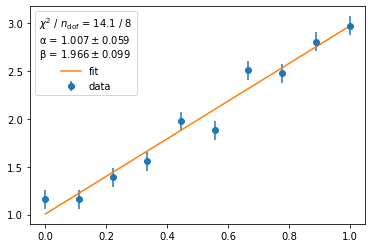

In [3]:
# iminuit contains a LeastSquares class to conveniently generate a least-squares cost function.
# We will revisit how to write this by hand in a later section.
least_squares = LeastSquares(data_x, data_y, data_yerr, line)

m = Minuit(least_squares, α=0, β=0)  # starting values for α and β

m.migrad()  # finds minimum of least_squares function
m.hesse()   # accurately computes uncertainties

# draw data and fitted line
plt.errorbar(data_x, data_y, data_yerr, fmt="o", label="data")
plt.plot(data_x, line(data_x, *m.values), label="fit")

# display legend with some fit info
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(data_x) - m.nfit}",
]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

plt.legend(title="\n".join(fit_info));

## SMPL example

Chi2 =  14.064905067721451


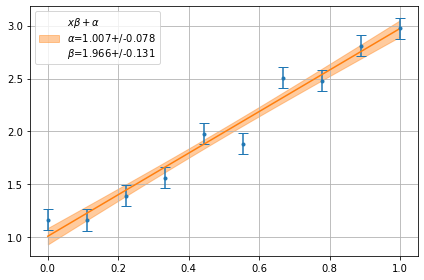

In [12]:
from smpl import plot
from smpl import fit
from uncertainties import unumpy as unp
y=unp.uarray(data_y,data_yerr)
ff = plot.fit(data_x,y , fmt='.', function=line, params=[1,1], sigmas=1,lpos=2)
print("Chi2 = ",fit.Chi2(data_x,y,line,ff))

In [13]:
from smpl import plot
from smpl import fit
from uncertainties import unumpy as unp
y=unp.uarray(data_y,data_yerr)
ff = plot.fit(data_x,y , fmt='.', function=line, params=[1,1], sigmas=1,lpos=2,fitter=fit.Fitter.MINUIT_LEASTSQUARES)
print("Chi2 = ",fit.Chi2(data_x,y,line,ff))